# Gephi 써서 하려다가 포기

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
from collections import Counter
import community as lv
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

In [2]:
df_raw = pd.read_excel('./빅카인즈_태양광.xlsx')
df = df_raw.copy()

# res = []
# for i in df['키워드']:
#     # print(i)
#     res.append(i)

# tmp = ','.join(res)
# tmp = tmp.replace(',', ' ')


# df['키워드'][0].split(',')

C:\Users\user\.conda\envs\han\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# from collections import Counter

edge_list = []
for keywords in df['키워드']:
    keywords = keywords.split(',')
    num_keyword = len(keywords)
    if num_keyword > 0:
        for i in range(num_keyword-1):
            for j in range(i+1, num_keyword):
                edge_list += [tuple(sorted([keywords[i], keywords[j]]))]    # node 간 위해 sorted 사용
                break
            break
# print(edge_list)
# print("======>", (len(edge_list)))
edges = list(Counter(edge_list).items())



""" networkx Graph 작성 """
# import networkx as nx


G = nx.Graph((x, y, {'weight': v}) for (x, y), v in edges)

In [8]:
tmp = ['한국', '태양광', '발전', '최고치', '태양광', '최고', '기록', '한국', '태양광', '발전', '5월', '전력량', '차지', '비율', '7%', '엠버', '국제', '에너지', '싱크탱크', '한국', '일본', '5월', '석탄', '가스', '위기', '태양광', '발전', '기록', '달성', '한국', '통계', '전력', '수요', '작성', '이래', '기준', '전력', '수요', '역대', '최고', '5월', '태양광', '발전', '최고치', '기록', '전력량', '차지', '비율', '7.17%', '최대전력', '월평균', '최대', '전력', '4.5%', '증가', '6만', '기록', '최고', '최대', '전력', '4년', '기록', '일본', '발전량', '태양광', '10테라와트시', 'TWh', '전력', '15%', '차지', '일본', '태양', '용량', '2010년', '20배', '증가', '확장', '태양광', '용량', '전력량', '지난', '태양광', '차지', '비중', '9.8%', '전문가들', '일본', '태양광', '확장', '여지', '한국', '1%', '비중', '태양광', '발전', '2021년', '4%', '국제', '평균', '한참', '아시아', '전역', '태양광', '인기', '아시아', '국가', '용량', '태양광', '발전', '상위', '개국', '5개국', '일본', '4위', '한국', '9위', '10년', '아시아', '세계', '국가', '일본', '중국', '추세', '세계적', '태양광', '풍력', '발전', '세계적', '가속화', '반영', '엠버', '국제전력', '보고서', '태양광', '풍력', '이래', '증가', '전력생산', '세계', '전력', '생산', '10분', '공급', '한국', '일본', '전력', '수요', '절반', '화석', '연료', '발전', '의존', '일본', '2021년', '전력', '68%', '화석연료', '생산', '일본', '중부', '타케토요', '신규석탄발전소', '건설', '시작', '한국', '전력량', '56.2%', '화석연료', '의존', '기후변화', '정부', '협의체', 'IPCC', '상승', '지구', '온도', '1.5도', '태양광', '풍력', '2030년', '세계', '전력', '40%', '수석전력정책분석가', '아디티아', '롤라', '엠버', '아시아', '수석', '전력', '정책', '분석가', '한국', '발전', '일본', '태양광', '지속적', '성장', '지속가능', '안전', '에너지', '공급', '긍정적', '신호', '발전', '용량', '증가', '가치', '국가', '활용', '잠재력']
keywords = tmp
num_keyword = len(keywords)

edge_list = []
for i in range(num_keyword-1):
    for j in range(i+1, num_keyword):
        edge_list += [tuple(sorted([keywords[i], keywords[j]]))]    # node 간 위해 sorted 사용

# print(edge_list)

In [11]:
edges = list(Counter(edge_list).items())
# edges

In [12]:
G = nx.Graph((x, y, {'weight': v}) for (x, y), v in edges)
# G

In [14]:
partition = lv.best_partition(G)
nx.set_node_attributes(G, partition, "community")   # graph G에 community 속성 추가

In [15]:
nx.write_gexf(G, '202101_keyword_community.gexf')

In [16]:
len(edge_list)

22155

# 지지도 기준 필터링

In [2]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.font_manager as fm
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

In [3]:
df_raw = pd.read_excel('./빅카인즈_태양광.xlsx')
df = df_raw.copy()

C:\Users\user\.conda\envs\han\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
tmp = df['키워드'][0].split(',')
tmp = ' '.join(tmp)
tmp = re.sub('[^가-힣a-zA-Z\s]', '', tmp)
tmp = tmp.split(' ')
# a = []
# for i in tmp:
#     if i != '':
#         a.append(i)
# tmp = a
tmp = [i for i in tmp if i != '']
print(tmp)
print(len(tmp))

['한국', '태양광', '발전', '최고치', '태양광', '최고', '기록', '한국', '태양광', '발전', '월', '전력량', '차지', '비율', '엠버', '국제', '에너지', '싱크탱크', '한국', '일본', '월', '석탄', '가스', '위기', '태양광', '발전', '기록', '달성', '한국', '통계', '전력', '수요', '작성', '이래', '기준', '전력', '수요', '역대', '최고', '월', '태양광', '발전', '최고치', '기록', '전력량', '차지', '비율', '최대전력', '월평균', '최대', '전력', '증가', '만', '기록', '최고', '최대', '전력', '년', '기록', '일본', '발전량', '태양광', '테라와트시', 'TWh', '전력', '차지', '일본', '태양', '용량', '년', '배', '증가', '확장', '태양광', '용량', '전력량', '지난', '태양광', '차지', '비중', '전문가들', '일본', '태양광', '확장', '여지', '한국', '비중', '태양광', '발전', '년', '국제', '평균', '한참', '아시아', '전역', '태양광', '인기', '아시아', '국가', '용량', '태양광', '발전', '상위', '개국', '개국', '일본', '위', '한국', '위', '년', '아시아', '세계', '국가', '일본', '중국', '추세', '세계적', '태양광', '풍력', '발전', '세계적', '가속화', '반영', '엠버', '국제전력', '보고서', '태양광', '풍력', '이래', '증가', '전력생산', '세계', '전력', '생산', '분', '공급', '한국', '일본', '전력', '수요', '절반', '화석', '연료', '발전', '의존', '일본', '년', '전력', '화석연료', '생산', '일본', '중부', '타케토요', '신규석탄발전소', '건설', '시작', '한국', '전력량', '화석연료', '의존

<>:3: DeprecationWarning: invalid escape sequence '\s'
<>:3: DeprecationWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_32408\2232357007.py:3: DeprecationWarning: invalid escape sequence '\s'
  tmp = re.sub('[^가-힣a-zA-Z\s]', '', tmp)


In [5]:
res = []
for i in df['키워드']:
    tmp = i.split(',')
    tmp = ' '.join(tmp)
    tmp = re.sub('[^가-힣a-zA-Z\s]', '', tmp)
    tmp = tmp.split(' ')
    tmp = [i for i in tmp if i != '']
    res.append(list(set(tmp)))
    # res.append(tmp)

<>:5: DeprecationWarning: invalid escape sequence '\s'
<>:5: DeprecationWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_32408\3791963593.py:5: DeprecationWarning: invalid escape sequence '\s'
  tmp = re.sub('[^가-힣a-zA-Z\s]', '', tmp)


In [134]:
len(res)

4217

In [6]:
print(res[:2])

[['한국', '화석', '추세', '차지', '발전량', '타케토요', '신호', '용량', '분', '지난', '온도', '석탄', '성장', '협의체', '가속화', '가치', '풍력', '정책', '엠버', '최대', '화석연료', '테라와트시', 'TWh', '신규석탄발전소', '기후변화', '월평균', '시작', '여지', '세계', '수석전력정책분석가', '인기', '통계', '태양', '아디티아', '확장', '위기', '건설', '기록', '안전', '발전', '전력생산', '최고치', '년', '개국', '이래', '중국', '연료', '비율', '작성', '정부', '의존', '최대전력', '중부', '국가', '최고', '전역', '지속가능', '월', '한참', '상위', '지구', '반영', 'IPCC', '상승', '수요', '활용', '일본', '도', '전력량', '보고서', '만', '위', '평균', '에너지', '역대', '잠재력', '배', '태양광', '아시아', '긍정적', '전력', '수석', '지속적', '전문가들', '싱크탱크', '생산', '달성', '기준', '국제', '증가', '가스', '롤라', '세계적', '절반', '공급', '분석가', '국제전력', '비중'], ['집행부', '방송영상밸리', '복원', '고양시', '대통령', '경기', '본부', '시장', '지원', 'LH', '김대중', '어린이', '제전', '고양시농산물가공지원센터', '고양시청소년재단', '고양시일산노인종합복지관', '상황실', '현장확인', '장미란체육관', '백마화', '신평', '상임위원회별', '태양광에너지설치시설', '고양시자원봉사센터', 'GH', '일산동구보건소', '마련', '고양시동물보호센터', '고양시체육회', '장항지구', '방문', '도시', '일산테크노밸리', '포함', '청취다방', '고양환경에너지시설', '계획', '펌프장', '급식', '기념관', '정례회', '곳', '수질', '목소리', '

In [7]:
te=TransactionEncoder()
te_arry=te.fit(res).transform(res)

In [8]:
df=pd.DataFrame(te_arry, columns=te.columns_)

In [9]:
frequency_itemsets=apriori(df, use_colnames=True, min_support=0.2, max_len=2)

# tmp = []
# for i in frequency_itemsets['itemsets']:
#     tmp.append(len(i))
# frequency_itemsets['length'] = tmp
# frequency_itemsets = frequency_itemsets[frequency_itemsets['length'] == 2]

In [10]:
frequency_itemsets = frequency_itemsets.reset_index(drop=True)

In [11]:
frequency_itemsets

,support,itemsets
0,0.299502,(가능)
1,0.234053,(강화)
2,0.220773,(경제)
3,0.431349,(계획)
4,0.262272,(공급)
...,...,...
178,0.202514,"(태양광, 한국)"
179,0.343609,"(확대, 태양광)"
180,0.234053,"(확보, 태양광)"
181,0.262983,"(태양광, 환경)"


In [12]:
rules = association_rules(frequency_itemsets, metric='confidence', min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(에너지),(가능),0.633863,0.299502,0.215319,0.339693,1.134193,0.025476,1.060867
1,(가능),(에너지),0.299502,0.633863,0.215319,0.718923,1.134193,0.025476,1.302623
2,(태양광),(가능),0.896135,0.299502,0.269386,0.300609,1.003695,0.000992,1.001582
3,(가능),(태양광),0.299502,0.896135,0.269386,0.899446,1.003695,0.000992,1.032928
4,(태양광),(강화),0.896135,0.234053,0.212236,0.236835,1.011888,0.002493,1.003646
...,...,...,...,...,...,...,...,...,...
237,(태양광),(확보),0.896135,0.257529,0.234053,0.261180,1.014178,0.003272,1.004942
238,(태양광),(환경),0.896135,0.294285,0.262983,0.293464,0.997210,-0.000736,0.998838
239,(환경),(태양광),0.294285,0.896135,0.262983,0.893634,0.997210,-0.000736,0.976491
240,(태양광),(활용),0.896135,0.296656,0.262746,0.293199,0.988346,-0.003098,0.995109


In [13]:
frequency_itemsets=apriori(df, use_colnames=True, min_support=0.2, max_len=2)

tmp = []
for i in frequency_itemsets['itemsets']:
    tmp.append(len(i))
frequency_itemsets['length'] = tmp
frequency_itemsets = frequency_itemsets[frequency_itemsets['length'] == 2]

In [14]:
frequency_itemsets

,support,itemsets,length
62,0.215319,"(에너지, 가능)",2
63,0.269386,"(태양광, 가능)",2
64,0.212236,"(태양광, 강화)",2
65,0.218165,"(계획, 기업)",2
66,0.290491,"(계획, 년)",2
...,...,...,...
178,0.202514,"(태양광, 한국)",2
179,0.343609,"(확대, 태양광)",2
180,0.234053,"(확보, 태양광)",2
181,0.262983,"(태양광, 환경)",2


In [15]:
ar=frequency_itemsets['itemsets']

G=nx.Graph()
G.add_edges_from(ar)

pr=nx.pagerank(G)
pr

C:\Users\user\.conda\envs\han\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


{'에너지': 0.10961563792052131,
 '가능': 0.009660047517358017,
 '태양광': 0.23550439867711923,
 '강화': 0.006554465307953637,
 '계획': 0.03218477206004171,
 '기업': 0.03570740182288223,
 '년': 0.05640441443430457,
 '발전': 0.03218477206004171,
 '사업': 0.03541746571991554,
 '생산': 0.023447637615540144,
 '일': 0.023447637615540144,
 '추진': 0.02068843760420479,
 '확대': 0.023447637615540144,
 '공급': 0.009660047517358017,
 '관계자': 0.006554465307953637,
 '구축': 0.006554465307953637,
 '규모': 0.015216984269958917,
 '글로벌': 0.006554465307953637,
 '시장': 0.015239380470190488,
 '투자': 0.015239380470190488,
 '기준': 0.006554465307953637,
 '만': 0.009374598249450755,
 '산업': 0.012480180458855135,
 '억': 0.012480180458855135,
 '정부': 0.012480180458855135,
 '대비': 0.006554465307953637,
 '미국': 0.009660047517358017,
 '분야': 0.009660047517358017,
 '사용': 0.009660047517358017,
 '상황': 0.006554465307953637,
 '설비': 0.006554465307953637,
 '설치': 0.006554465307953637,
 '성장': 0.006554465307953637,
 '세계': 0.006554465307953637,
 '신재생': 0.009660047517

In [16]:
nsize=np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))
print(len(nsize))

54


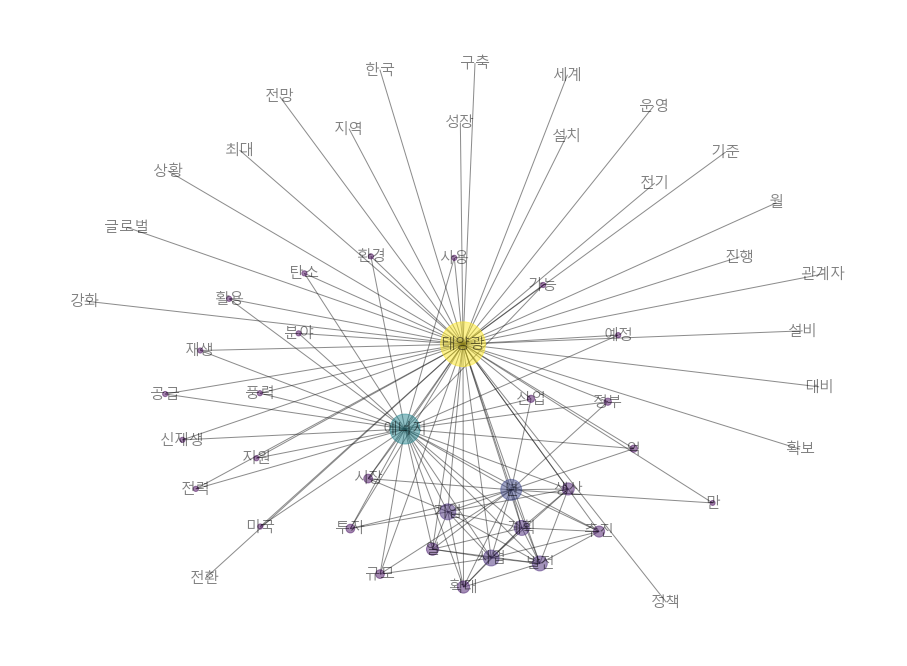

In [172]:
plt.figure(figsize=(16,12)); plt.axis('off')

fname = fm.FontProperties().get_name()
#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(G, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)

# 완성 코드

# 파일 로드

In [17]:
df_raw = pd.read_excel('./빅카인즈_태양광.xlsx')
df = df_raw.copy()

C:\Users\user\.conda\envs\han\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# 데이터 전처리

In [18]:
res = []
for i in df['키워드']:
    tmp = i.split(',')
    tmp = ' '.join(tmp)
    tmp = re.sub('[^가-힣a-zA-Z\s]', '', tmp)
    tmp = tmp.split(' ')
    tmp = [i for i in tmp if i != '']
    res.append(list(set(tmp)))
    # res.append(tmp)

<>:5: DeprecationWarning: invalid escape sequence '\s'
<>:5: DeprecationWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_32408\3791963593.py:5: DeprecationWarning: invalid escape sequence '\s'
  tmp = re.sub('[^가-힣a-zA-Z\s]', '', tmp)


In [19]:
def del_one(text):
    return [i for i in text if len(i)!=1]

In [20]:
aaa = [['aaa', 'a', 'aa'], ['bbb', 'b', 'bb']]
for idx,i in enumerate(aaa):
    aaa[idx] = del_one(i)
print(aaa)

[['aaa', 'aa'], ['bbb', 'bb']]


In [21]:
for idx,i in enumerate(res):
    res[idx] = del_one(i)

# 지지도 값 찾기

In [22]:
te=TransactionEncoder()
te_arry=te.fit(res).transform(res)
df=pd.DataFrame(te_arry, columns=te.columns_)

In [23]:
support_list=[0.35, 0.3, 0.25, 0.2]
con_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


total=[]
for i in support_list:
    frequent_itemsets = apriori(df, min_support=i, use_colnames=True)
    row=[]
    for j in con_list:
        tmp= association_rules(frequent_itemsets, metric="confidence", min_threshold=j)
        row.append(len(tmp))
    total.append(row)
total

[[12, 12, 12, 12, 8, 7, 6, 6, 5],
 [44, 44, 44, 37, 30, 23, 19, 13, 11],
 [104, 104, 96, 81, 64, 51, 43, 29, 20],
 [368, 368, 311, 252, 203, 154, 132, 92, 72]]

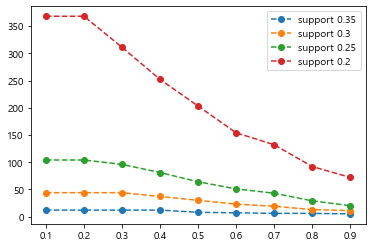

In [24]:
con_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
support_list=[0.35, 0.3, 0.25, 0.2]

for y,name in zip(total,support_list):

    plt.plot(con_list,y,'o',linestyle='dashed', label='support ' + str(name))
    plt.legend()

# 네트워크 시각화

In [25]:
# stopwords = ['태양광', '에너지', '신재생']
stopwords = ['만', '억', '일', '년']

In [28]:
# 데이터 전처리
res = []
for i in df['키워드']:
    tmp = i.split(',')
    tmp = ' '.join(tmp)
    tmp = re.sub('[^가-힣a-zA-Z\s]', '', tmp)
    tmp = tmp.split(' ')
    tmp = [i for i in tmp if i != '']
    tmp = [i for i in tmp if i not in stopwords]
    res.append(list(set(tmp)))
    # res.append(tmp)

<>:6: DeprecationWarning: invalid escape sequence '\s'
<>:6: DeprecationWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_20184\813940738.py:6: DeprecationWarning: invalid escape sequence '\s'
  tmp = re.sub('[^가-힣a-zA-Z\s]', '', tmp)
C:\Users\user\AppData\Local\Temp\ipykernel_20184\813940738.py:6: DeprecationWarning: invalid escape sequence '\s'
  tmp = re.sub('[^가-힣a-zA-Z\s]', '', tmp)


AttributeError: 'bool' object has no attribute 'split'

C:\Users\user\.conda\envs\han\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


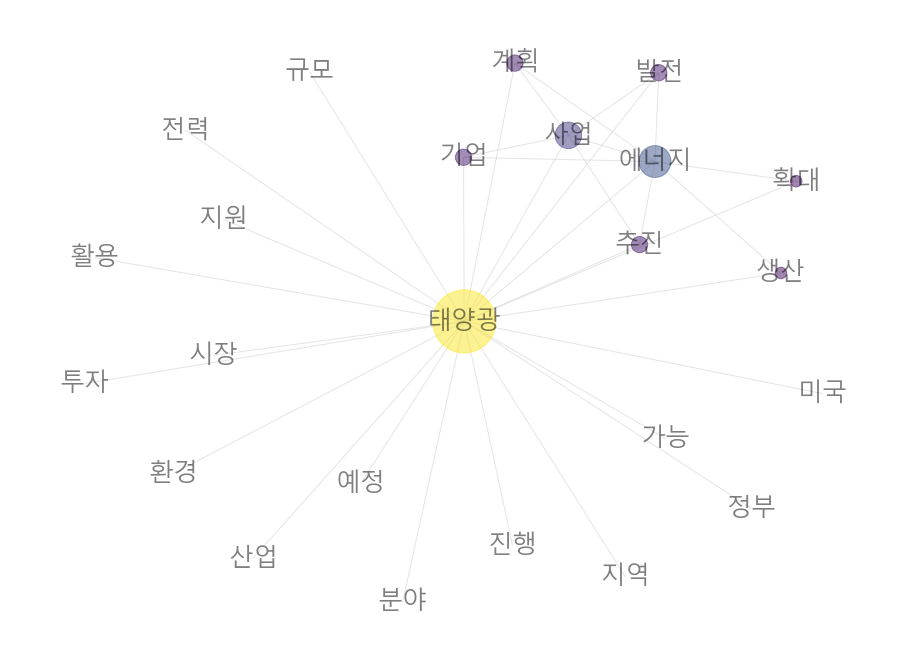

In [32]:
# fit, transform, apriori
te=TransactionEncoder()
te_arry=te.fit(res).transform(res)
df_te=pd.DataFrame(te_arry, columns=te.columns_)
frequency_itemsets=apriori(df_te, use_colnames=True, min_support=0.25, max_len=2)


# length 2만 추출
tmp = []
for i in frequency_itemsets['itemsets']:
    tmp.append(len(i))
frequency_itemsets['length'] = tmp
frequency_itemsets = frequency_itemsets[frequency_itemsets['length'] == 2]


# 네트워크 그래프
ar=frequency_itemsets['itemsets']
G=nx.Graph()
G.add_edges_from(ar)
pr=nx.pagerank(G)

nsize=np.array([v for v in pr.values()])
nsize=4000*(nsize-min(nsize))/(max(nsize)-min(nsize))

plt.figure(figsize=(16,12)); plt.axis('off')
fname = fm.FontProperties().get_name()
nx.draw_networkx(G, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.8', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=25)

plt.savefig('빅카인즈_태양광_네트워크.png')
plt.show()

# 네트워크 (정책 기준)

In [241]:
# fit, transform, apriori
te=TransactionEncoder()
te_arry=te.fit(res).transform(res)
df_te=pd.DataFrame(te_arry, columns=te.columns_)
frequency_itemsets=apriori(df_te, use_colnames=True, min_support=0.2)


# # length 2만 추출
# tmp = []
# for i in frequency_itemsets['itemsets']:
#     tmp.append(len(i))
# frequency_itemsets['length'] = tmp
# frequency_itemsets = frequency_itemsets[frequency_itemsets['length'] == 2]
# frequency_itemsets = frequency_itemsets.reset_index(drop=True)

In [242]:
frequency_itemsets

,support,itemsets
0,0.299502,(가능)
1,0.234053,(강화)
2,0.220773,(경제)
3,0.431349,(계획)
4,0.262272,(공급)
...,...,...
230,0.207968,"(에너지, 활용, 태양광)"
231,0.204648,"(에너지, 년, 계획, 태양광)"
232,0.206071,"(기업, 에너지, 년, 태양광)"
233,0.229310,"(에너지, 발전, 년, 태양광)"


In [243]:
rules = association_rules(frequency_itemsets, metric='confidence', min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(에너지),(가능),0.633863,0.299502,0.215319,0.339693,1.134193,0.025476,1.060867
1,(가능),(에너지),0.299502,0.633863,0.215319,0.718923,1.134193,0.025476,1.302623
2,(가능),(태양광),0.299502,0.896135,0.269386,0.899446,1.003695,0.000992,1.032928
3,(태양광),(가능),0.896135,0.299502,0.269386,0.300609,1.003695,0.000992,1.001582
4,(강화),(태양광),0.234053,0.896135,0.212236,0.906788,1.011888,0.002493,1.114294
...,...,...,...,...,...,...,...,...,...
581,"(생산, 태양광)","(에너지, 년)",0.366137,0.396728,0.201802,0.551166,1.389280,0.056546,1.344088
582,(에너지),"(년, 생산, 태양광)",0.633863,0.249704,0.201802,0.318369,1.274987,0.043524,1.100737
583,(년),"(에너지, 생산, 태양광)",0.563434,0.282665,0.201802,0.358165,1.267099,0.042539,1.117631
584,(생산),"(에너지, 년, 태양광)",0.398150,0.369457,0.201802,0.506849,1.371876,0.054703,1.278601


In [230]:
rules['antecedents'][0]

frozenset({'가능'})

In [246]:
for idx,i in enumerate(rules['antecedents']):
    if '정책' in i:
        print(idx,i)

214 frozenset({'정책'})


In [247]:
rules.loc[214, :]

antecedents               (정책)
consequents              (태양광)
antecedent support    0.237135
consequent support    0.896135
support               0.216979
confidence               0.915
lift                  1.021052
leverage              0.004474
conviction            1.221945
Name: 214, dtype: object